**Stuff to add:**

- Confusion matrix and other techniques

**1 Packages**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.callbacks import EarlyStopping, History
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import randint as sp_randint
from random import randint
import warnings

**2 Importing Data**

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
test_df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [6]:
features_train = train_df.drop(['label'], axis=1)
labels_train = train_df['label']

**3 Visualisation**

**3.1 Image Visualisation**

Text(0.5, 1.0, 'Image 10 with label = 8')

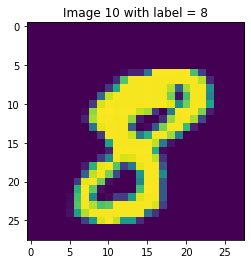

In [7]:
idx = 10
image = np.array(features_train.iloc[idx, :])
image = image.reshape(28, -1)
plt.imshow(image)
plt.title(f"Image {idx} with label = {labels_train[idx]}")

**3.2 PCA for Visualisation**

PCA does seems to separate out the different classes, but they are not in well defined clusters

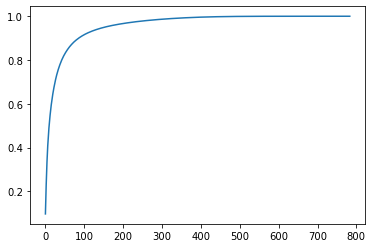

In [9]:
# A good about of the variance is explained with around 100 principal components so it will be reduced to this to visualise
pca = PCA()
pca.fit(features_train)
variance_cumsum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(pca.n_components_), variance_cumsum)

In [10]:
pca_final = PCA(n_components = 100)
features_pca = pca_final.fit_transform(features_train)
print("Explained variance ratio for 100 principal components is:", pca_final.explained_variance_ratio_.sum())

Explained variance ratio for 100 principal components is: 0.9147508536855374


Text(0.5, 1.0, 'Image 100 with label = 9')

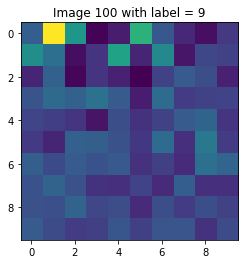

In [342]:
# reshape into a 10 by 10 image because it there are 100 principal components
idx = 100
image = np.array(features_pca[idx])
image = image.reshape(10, -1)
plt.imshow(image)
plt.title(f"Image {idx} with label = {labels_train[idx]}")

In [9]:
# Fitting model with 2 principal components to allow for good visualisation
pca = PCA(n_components=2)

pca_features = pca.fit_transform(features_train)

pca_features = pd.DataFrame(np.column_stack((pca_features, labels_train)), columns=['PC1', 'PC2', 'Y'])

pca_features['Y'] = pca_features['Y'].astype(int)

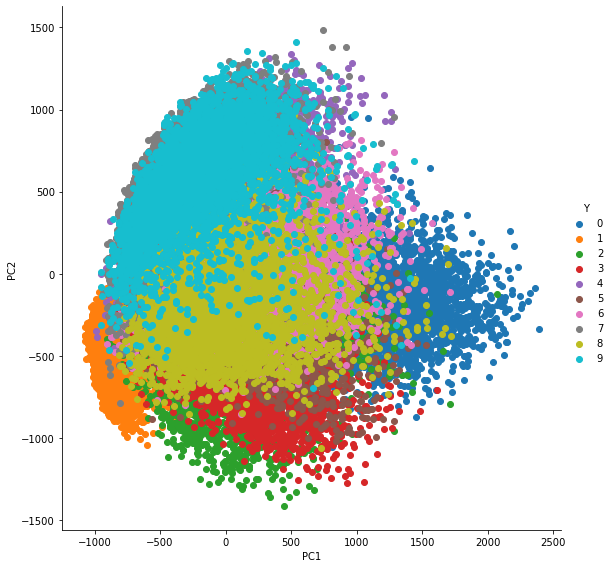

In [10]:
grid = sns.FacetGrid(data=pca_features, hue='Y', height=8)
grid.map(plt.scatter, 'PC1', 'PC2').add_legend()

**3.3 Kernel PCA Visualisation**

kPCA does seems to separate out the different classes, but they are not in well defined clusters

In [16]:
# Used two components to be able to visualise the dataset
kernel_pca = KernelPCA(n_components=2)

features_reduced = features_train.iloc[:15000, :]
labels_reduced = labels_train.iloc[:15000]

kpca_features = kernel_pca.fit_transform(features_reduced)

kpca_features = pd.DataFrame(np.column_stack((kpca_features, labels_reduced)), columns=['PC1', 'PC2', 'Y'])

kpca_features.Y = kpca_features.Y.astype(int)

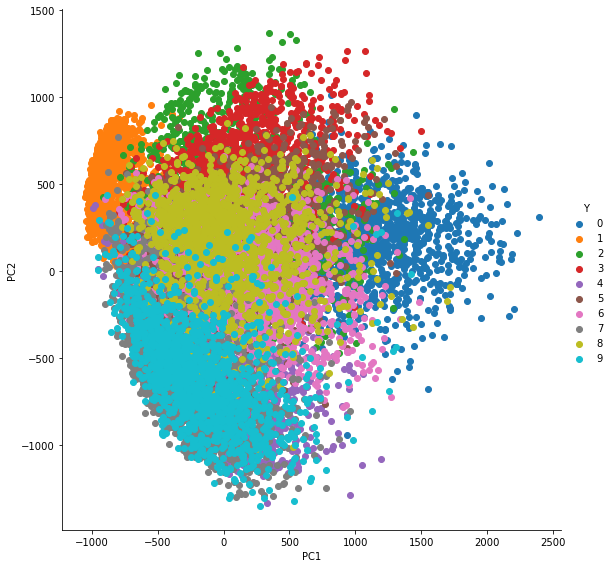

In [17]:
grid_kpca = sns.FacetGrid(kpca_features, hue='Y', height=8)

grid_kpca.map(plt.scatter, 'PC1', 'PC2').add_legend()

**3.4 TSNE Visualisation**

TSNE can be seen to separate out the different classes quite well, even with relatively few components

In [343]:
#Setting number of components as 2 to allow for easy visualisation
tsne = TSNE(n_components=2)

tsne_features = tsne.fit_transform(features_train)

tsne_features = pd.DataFrame(np.column_stack((tsne_features, labels_train)), columns=['x', 'y', 'target'])

tsne_features.target = tsne_features.target.astype(int)

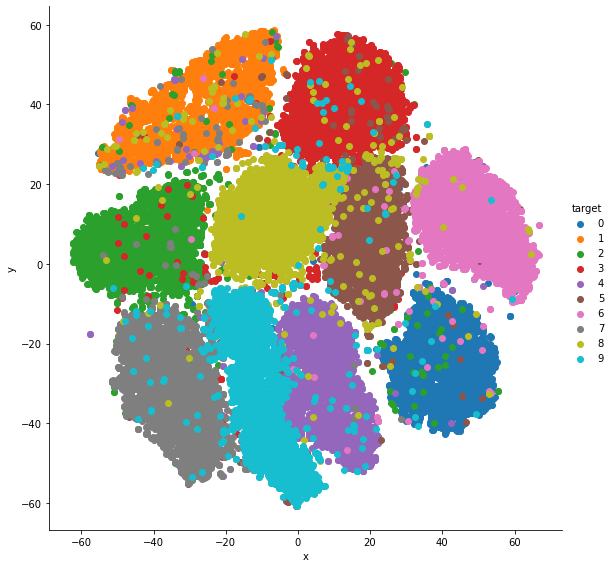

In [345]:
grid_tsne = sns.FacetGrid(tsne_features, hue='target', height=8)

grid_tsne.map(plt.scatter, 'x', 'y').add_legend()

**3.5 Clustering Visualisation**

In [249]:
kmeans_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10, random_state=0))
])

kmeans_pipeline.fit(features_train)

kmeans_labels = kmeans_pipeline['kmeans'].labels_

In [250]:
kmeans_labels

array([4, 3, 4, ..., 1, 9, 6])

In [255]:
features_scaled = kmeans_pipeline['scaler'].transform(features_train)

features_scaled = pd.DataFrame(features_scaled, columns=features_train.columns)

In [266]:
np.unique(kmeans_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'pixel400')

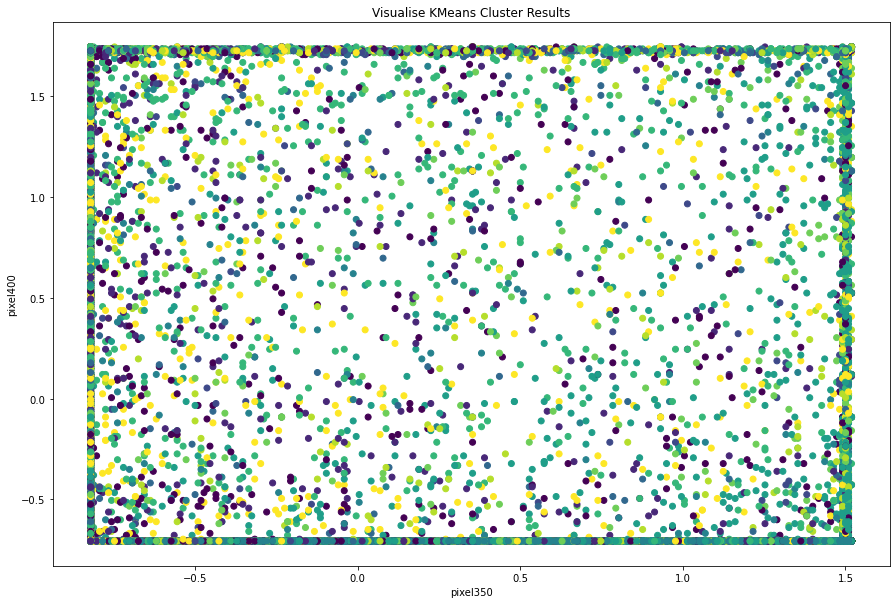

In [269]:
# Randomly choose two pixels to visualise clusters

plt.figure(figsize=(15, 10))
plt.scatter(features_scaled.pixel350, features_scaled.pixel400, c=kmeans_labels)
plt.title('Visualise KMeans Cluster Results')
plt.xlabel('pixel350')
plt.ylabel('pixel400')

In [7]:
kmeans = KMeans(n_clusters=2)

kmeans_features = kmeans.fit_transform(features_train)

kmeans_features = pd.DataFrame(np.column_stack((kmeans_features, labels_train)), columns=['x', 'y', 'target'])

kmeans_features.target = kmeans_features.target.astype(int)

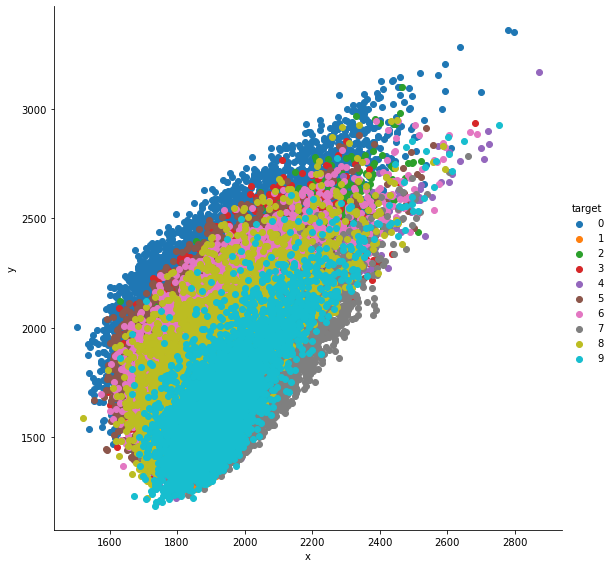

In [8]:
grid_kmeans = sns.FacetGrid(kmeans_features, hue='target', height=8)

grid_kmeans.map(plt.scatter, 'x', 'y').add_legend()

**3.6 Targets**

It can be seen that the training set labels are fairly evenly distributed, meaning that the classes are not skewed. Therefore, accuracy, precision, recall, F-1 score and AUC can be used as the evaluation metric. For simplicity classification accuracy was used.

Text(0.5, 1.0, 'Count of each label in training set')

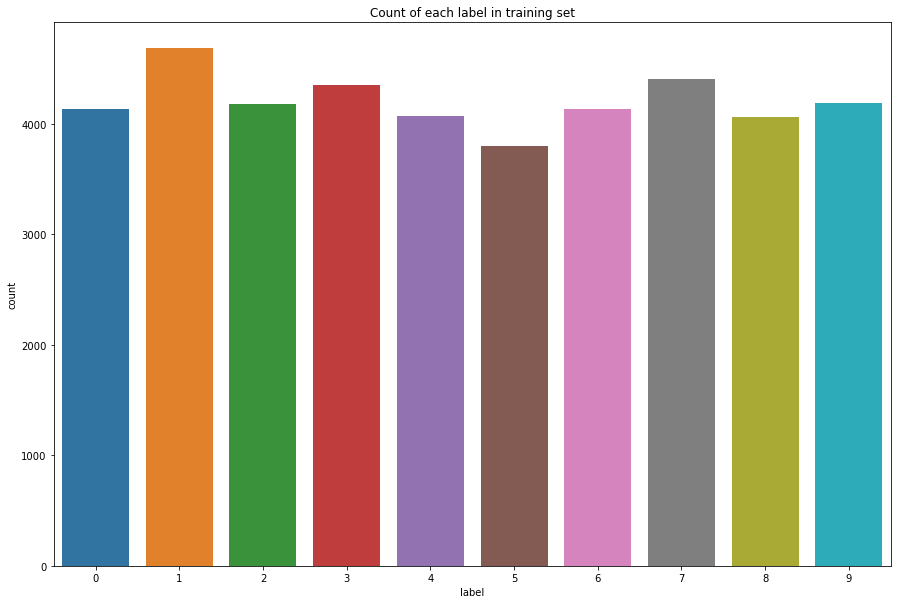

In [40]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train_df, x='label')
plt.title('Count of each label in training set')

**4 XGB Classifier**

**4.1 Default XGB**

**Model 1 - Test accuracy = 0.9736**

XGB seems to give very good training predictions when the model is trained on the entire training set (giving an classification accuracy of 1). Further to this it gives perfect precision, recall and F1-scores (possibly hinting at some overfitting to the training set, meaning regularization may help perform better on the test set). When 5-fold cross-validation was used the average classification accuracy decreased slightly, giving a classification accuracy of 0.97. This shows that even though the performance isn't perfect, the model still performs extremely well on data it has not seen before. This may mean that some fine-tuning could be performed to improve the model's accuracy. 

**Model 2 (After Fine-tuning) - Test accuracy =**

In [69]:
warnings.filterwarnings(action='ignore', category=UserWarning)

xgb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False))
])

xgb_pipeline.fit(features_train, labels_train)

score_xgb = xgb_pipeline.score(features_train, labels_train)

print(f"XGB Classifier Score = {score_xgb}")

[10:46:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier Score = 1.0


In [107]:
indices = test_df.index

test_preds = xgb_pipeline.predict(test_df)

preds_output = np.array([indices, test_preds])

test_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

test_preds_df['ImageId'] += 1

test_preds_df.to_csv('xgb_preds.csv')

In [207]:
# Cross val scores

xgb_cross_val = cross_val_score(xgb_pipeline, features_train, labels_train, scoring='accuracy', cv=5)

print(f"Xgb cross val scores were: {xgb_cross_val}, with an average score of: {xgb_cross_val.mean()}")

[10:04:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [213]:
xgb_preds_train = xgb_pipeline.predict(features_train)

print(classification_report(labels_train, xgb_preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



**4.1.1 Fine-Tuning**

In [214]:
xgb_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=16, num_parallel_tree=1,
                 objective='multi:softprob', random_state=0, reg_alpha=0,
                 reg_lambda=1, scale_pos_weight=None, subsample=1,
                 tree_method='exact', use_label_encoder=False,
                 validate_parameters=1, verbosity=None))],
 'verbose': False,
 'scaler': StandardScaler(),
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='

In [ ]:
param_grid = {'xgb__n_estimators': sp_randint(50, 500), 'xgb__max_depth': sp_randint(5, 15)}

grid = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

search = grid.fit(features_train, labels_train)

print(f"XGB Model Best Parameters: {search.best_params_}")

**4.2 XGB with PCA Data**

In [102]:
warnings.filterwarnings(action='ignore', category=UserWarning)

xgb_pipeline_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('xgb', XGBClassifier(use_label_encoder=False))
])

xgb_pipeline_pca.fit(features_train, labels_train)

score_xgb_pca = xgb_pipeline_pca.score(features_train, labels_train)

print(f"XGB Classifier Score (with PCA) = {score_xgb_pca}")

[11:30:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier Score (with PCA) = 1.0


In [103]:
indices = test_df.index

test_preds = xgb_pipeline_pca.predict(test_df)

preds_output = np.array([indices, test_preds])

test_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

test_preds_df['ImageId'] += 1

test_preds_df.to_csv('xgb_pca_preds.csv')

In [208]:
# Cross val scores

xgb_pca_cross_val = cross_val_score(xgb_pipeline_pca, features_train, labels_train, scoring='accuracy', cv=5)

print(f"Xgb PCA cross val scores were: {xgb_pca_cross_val}, with an average score of: {xgb_pca_cross_val.mean()}")

[10:15:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

**5 Random Forest**

In [13]:
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

rf_pipeline.fit(features_train, labels_train)

score_rf = rf_pipeline.score(features_train, labels_train)

print(f"RF Classifier Score = {score_rf}")

RF Classifier Score = 1.0


In [101]:
indices = test_df.index

test_preds = rf_pipeline.predict(test_df)

preds_output = np.array([indices, test_preds])

test_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

test_preds_df['ImageId'] += 1

test_preds_df.to_csv('rf_preds.csv')

In [209]:
# Cross val scores

rf_cross_val = cross_val_score(rf_pipeline, features_train, labels_train, scoring='accuracy', cv=5)

print(f"RF cross val scores were: {rf_cross_val}, with an average score of: {rf_cross_val.mean()}")

RF cross val scores were: [0.96297619 0.96380952 0.9625     0.9652381  0.96571429], with an average score of: 0.9640476190476189


In [14]:
rf_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [16]:
param_grid = {'rf__n_estimators': sp_randint(50, 500)}

grid = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

search = grid.fit(features_train, labels_train)

print(f"RF Model Best Parameters: {search.best_params_}")

print(f"RF Model Score: {search.best_score_}")

RF Model Best Parameters: {'rf__n_estimators': 356}
RF Model Score: 0.9661666666666667


**6 K-nearest neighbour**

In [119]:
KNN_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=1))
])

KNN_pipeline.fit(features_train, labels_train)

scores_KNN = KNN_pipeline.score(features_train, labels_train)

print(f"KNN Classifier Score = {scores_KNN}")

KNN Classifier Score = 1.0


In [120]:
indices = test_df.index

test_preds = KNN_pipeline.predict(test_df)

preds_output = np.array([indices, test_preds])

test_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

test_preds_df['ImageId'] += 1

test_preds_df.to_csv('KNN_preds_1_neighbor.csv')

In [210]:
# Cross val scores

KNN_cross_val = cross_val_score(KNN_pipeline, features_train, labels_train, scoring='accuracy', cv=5)

print(f"KNN cross val scores were: {KNN_cross_val}, with an average score of: {KNN_cross_val.mean()}")

KNN cross val scores were: [0.93083333 0.94404762 0.93345238 0.94095238 0.93880952], with an average score of: 0.9376190476190477


**7 Logistic Regression**

In [117]:
LR_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

LR_pipeline.fit(features_train, labels_train)

scores_LR = LR_pipeline.score(features_train, labels_train)

print(f"LR Classifier Score = {scores_LR}")

LR Classifier Score = 0.9507142857142857


In [ ]:
indices = test_df.index

test_preds = LR_pipeline.predict(test_df)

preds_output = np.array([indices, test_preds])

test_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

test_preds_df['ImageId'] += 1

test_preds_df.to_csv('KNN_preds.csv')

In [211]:
# Cross val scores

LR_cross_val = cross_val_score(LR_pipeline, features_train, labels_train, scoring='accuracy', cv=5)

print(f"LR cross val scores were: {LR_cross_val}, with an average score of: {LR_cross_val.mean()}")

LR cross val scores were: [0.90738095 0.90714286 0.9025     0.905      0.91369048], with an average score of: 0.9071428571428571


**8 Fully Connected Neural Network**

In [29]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_train)

In [201]:
model = tf.keras.Sequential()
model.add(tfl.Input(shape=(784,)))
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(300, activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(300, activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(300, activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(100, activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(labels_train.nunique(), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
labels_onehot = pd.get_dummies(labels_train)

In [202]:
model.fit(features_scaled, labels_onehot, epochs=50)

Epoch 1/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3555 - accuracy: 0.8897
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1948 - accuracy: 0.9400
Epoch 3/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1515 - accuracy: 0.9525
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1302 - accuracy: 0.9578
Epoch 5/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1089 - accuracy: 0.9656
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1003 - accuracy: 0.9679
Epoch 7/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0930 - accuracy: 0.9705
Epoch 8/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0798 - accuracy: 0.9742
Epoch 9/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0719 - accuracy: 0.9761
Epoch 10/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.071

In [203]:
indices = test_df.index

NN_preds = np.argmax(model.predict(test_df), axis=-1)

preds_output = np.array([indices, NN_preds])

NN_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

NN_preds_df['ImageId'] += 1

NN_preds_df.to_csv('NN_preds_2.csv')

**9 Convolutional Neural Network**

In [31]:
features_conv = np.array(features_scaled).reshape(42000, 28, 28, 1)

Text(0.5, 1.0, 'Image 20 with label = 8')

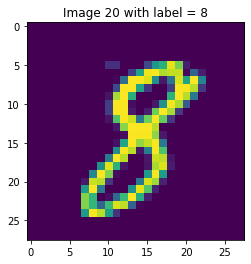

In [51]:
idx = 20
image = features_conv[idx]
plt.imshow(image)
plt.title(f"Image {idx} with label = {labels_train[idx]}")

In [27]:
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)

**9.1 CNN 1**

**Test Accuracy = 0.99103**

It was seen that the shallower model (CNN 1) performed better than then deeper model (CNN 2). This could be thought of being due to the data only being grayscale, meaning that there are not that interesting of functions to compute in later layers, meaning that these layers only serve to overfit to the training data more, resulting in a decreased test accuracy. Furthermore, this can also be due as the model gets deeper the problem of vanishing gradients gets worse, resulting in poorer predictions, meaning that shallower model is ultimately better, or the presence of skip connections could aid in training a deeper model.

In [176]:
model_conv = tf.keras.Sequential()
model_conv.add(tfl.Input(shape=(28, 28, 1)))
model_conv.add(tfl.Dropout(rate=0.1))
model_conv.add(tfl.Conv2D(96, 5, padding='same', strides=2))
model_conv.add(tfl.BatchNormalization())
model_conv.add(tfl.ReLU())
model_conv.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv.add(tfl.Flatten())
model_conv.add(tfl.Dense(10, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_52 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 96)        2496      
_________________________________________________________________
batch_normalization_56 (Batc (None, 14, 14, 96)        384       
_________________________________________________________________
re_lu_54 (ReLU)              (None, 14, 14, 96)        0         
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 4704)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

In [178]:
model_conv.fit(features_conv, labels_onehot, epochs=50, callbacks=[es])

Epoch 1/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2772 - accuracy: 0.9264
Epoch 2/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1322 - accuracy: 0.9642
Epoch 3/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0981 - accuracy: 0.9716
Epoch 4/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0849 - accuracy: 0.9760
Epoch 5/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0741 - accuracy: 0.9783
Epoch 6/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0710 - accuracy: 0.9789
Epoch 7/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0636 - accuracy: 0.9818
Epoch 8/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0559 - accuracy: 0.9829
Epoch 9/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0549 - accuracy: 0.9840
Epoch 10/50
1313/1313 [==============================] - 19s 14m

In [179]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

NN_preds = np.argmax(model_conv.predict(test_scaled), axis=1)

preds_output = np.array([index, NN_preds])

NN_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

NN_preds_df['ImageId'] += 1

**9.2 CNN 2**

**Test Accuracy = 0.98207**

See **9.1 CNN 1** for comments

In [225]:
model_conv2 = tf.keras.Sequential()
model_conv2.add(tfl.Input(shape=(28, 28, 1)))
model_conv2.add(tfl.Dropout(rate=0.1))
model_conv2.add(tfl.Conv2D(96, 5, padding='same', strides=2))
model_conv2.add(tfl.BatchNormalization())
model_conv2.add(tfl.ReLU())
model_conv2.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv2.add(tfl.Dropout(rate=0.1))
model_conv2.add(tfl.Conv2D(96, 3, padding='same', strides=2))
model_conv2.add(tfl.BatchNormalization())
model_conv2.add(tfl.ReLU())
model_conv2.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv2.add(tfl.Dropout(rate=0.1))
model_conv2.add(tfl.Conv2D(64, 5, padding='same', strides=2))
model_conv2.add(tfl.BatchNormalization())
model_conv2.add(tfl.ReLU())
model_conv2.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv2.add(tfl.Flatten())
model_conv2.add(tfl.Dense(10, activation='softmax'))
model_conv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv2.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_65 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 96)        2496      
_________________________________________________________________
batch_normalization_69 (Batc (None, 14, 14, 96)        384       
_________________________________________________________________
re_lu_67 (ReLU)              (None, 14, 14, 96)        0         
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 96)        

In [226]:
model_conv2.fit(features_conv, labels_onehot, epochs=100, callbacks=[es])

Epoch 1/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2339 - accuracy: 0.9325
Epoch 2/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.1067 - accuracy: 0.9667
Epoch 3/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0854 - accuracy: 0.9733
Epoch 4/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0713 - accuracy: 0.9777
Epoch 5/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0639 - accuracy: 0.9797
Epoch 6/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0561 - accuracy: 0.9819
Epoch 7/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0508 - accuracy: 0.9838
Epoch 8/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 9/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0472 - accuracy: 0.9846
Epoch 10/100
1313/1313 [==============================]

In [177]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

NN_preds = np.argmax(model_conv.predict(test_scaled), axis=1)

preds_output = np.array([index, NN_preds])

NN_preds_df = pd.DataFrame(preds_output.T, columns=['ImageId', 'Label'])

NN_preds_df['ImageId'] += 1

**9.3 CNN Ensemble 3**

In this submission I will make predictions using 5 convolutional neural networks, the two previously trained networks and 3 networks trained using randomly generated hyperparameter values.

**9.3.1 CNN 3**

In [202]:
conv_layers = randint(1, 3)
conv_layers

1

In [199]:
dense_layers = randint(1, 3)
dense_layers

3

In [200]:
conv_layer_1_filter_no = randint(50, 150)
conv_layer_1_filter_size = randint(2, 10)
dense_layer_1_neurons = randint(100, 500)
dense_layer_2_neurons = randint(100, 500)
dense_layer_3_neurons = randint(50, 150)

In [203]:
print(f"""CNN 3 Hyperparameters:

    Number of convolutional layers = {conv_layers}
    Conv layer one filters = {conv_layer_1_filter_no}, filter_size = {conv_layer_1_filter_size}\n
    Dense layer one neurons = {dense_layer_1_neurons}
    Dense layer two neurons = {dense_layer_2_neurons}
    Dense layer three neurons = {dense_layer_3_neurons}""")

CNN 3 Hyperparameters:

    Number of convolutional layers = 1
    Conv layer one filters = 102, filter_size = 6

    Dense layer one neurons = 330
    Dense layer two neurons = 342
    Dense layer three neurons = 62


In [204]:
model_conv3 = tf.keras.Sequential()
model_conv3.add(tfl.Input(shape=(28,28,1)))
model_conv3.add(tfl.Dropout(rate=0.1))
model_conv3.add(tfl.Conv2D(102, 6, padding='same', strides=2))
model_conv3.add(tfl.BatchNormalization())
model_conv3.add(tfl.ReLU())
model_conv3.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv3.add(tfl.Flatten())
model_conv3.add(tfl.Dense(330, activation='relu'))
model_conv3.add(tfl.Dense(342, activation='relu'))
model_conv3.add(tfl.Dense(62, activation='relu'))
model_conv3.add(tfl.Dense(10, activation='softmax'))
model_conv3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv3.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_57 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 102)       3774      
_________________________________________________________________
batch_normalization_61 (Batc (None, 14, 14, 102)       408       
_________________________________________________________________
re_lu_59 (ReLU)              (None, 14, 14, 102)       0         
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 7, 7, 102)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 4998)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 330)             

In [205]:
model_conv3.fit(features_conv, labels_onehot, epochs=50, callbacks=[es])

Epoch 1/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.2639 - accuracy: 0.9254
Epoch 2/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.1125 - accuracy: 0.9686
Epoch 3/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0838 - accuracy: 0.9758
Epoch 4/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0729 - accuracy: 0.9807
Epoch 5/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0604 - accuracy: 0.9821
Epoch 6/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0541 - accuracy: 0.9852
Epoch 7/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0490 - accuracy: 0.9867
Epoch 8/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0445 - accuracy: 0.9874
Epoch 9/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0380 - accuracy: 0.9889
Epoch 10/50
1313/1313 [==============================] - 25s 19m

**9.3.2 CNN 4**

In [213]:
conv_layers = randint(1, 5)
conv_layers

4

In [214]:
dense_layers = randint(1, 5)
dense_layers

2

In [215]:
conv_layer_1_filter_no = randint(50, 150)
conv_layer_1_filter_size = randint(2, 10)
conv_layer_2_filter_no = randint(50, 150)
conv_layer_2_filter_size = randint(2, 10)
conv_layer_3_filter_no = randint(50, 150)
conv_layer_3_filter_size = randint(2, 10)
conv_layer_4_filter_no = randint(50, 150)
conv_layer_4_filter_size = randint(2, 10)
dense_layer_1_neurons = randint(100, 500)
dense_layer_2_neurons = randint(100, 500)

In [217]:
print(f"""CNN 4 Hyperparameters:

    Number of convolutional layers = {conv_layers}
    Conv layer one filters = {conv_layer_1_filter_no}, filter_size = {conv_layer_1_filter_size}
    Conv layer two filters = {conv_layer_2_filter_no}, filter_size = {conv_layer_2_filter_size}
    Conv layer three filters = {conv_layer_3_filter_no}, filter_size = {conv_layer_3_filter_size}
    Conv layer four filters = {conv_layer_4_filter_no}, filter_size = {conv_layer_4_filter_size}\n
    Dense layer one neurons = {dense_layer_1_neurons}
    Dense layer two neurons = {dense_layer_2_neurons}""")

CNN 4 Hyperparameters:

    Number of convolutional layers = 4
    Conv layer one filters = 138, filter_size = 9
    Conv layer two filters = 118, filter_size = 5
    Conv layer three filters = 68, filter_size = 10
    Conv layer four filters = 126, filter_size = 9

    Dense layer one neurons = 458
    Dense layer two neurons = 287


In [218]:
model_conv4 = tf.keras.Sequential()
model_conv4.add(tfl.Input(shape=(28,28,1)))
model_conv4.add(tfl.Dropout(rate=0.1))
model_conv4.add(tfl.Conv2D(138, 9, padding='same', strides=2))
model_conv4.add(tfl.BatchNormalization())
model_conv4.add(tfl.ReLU())
model_conv4.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv4.add(tfl.Dropout(rate=0.1))
model_conv4.add(tfl.Conv2D(118, 5, padding='same', strides=2))
model_conv4.add(tfl.BatchNormalization())
model_conv4.add(tfl.ReLU())
model_conv4.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv4.add(tfl.Dropout(rate=0.1))
model_conv4.add(tfl.Conv2D(68, 10, padding='same', strides=2))
model_conv4.add(tfl.BatchNormalization())
model_conv4.add(tfl.ReLU())
model_conv4.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv4.add(tfl.Dropout(rate=0.1))
model_conv4.add(tfl.Conv2D(126, 9, padding='same', strides=2))
model_conv4.add(tfl.BatchNormalization())
model_conv4.add(tfl.ReLU())
model_conv4.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv4.add(tfl.Flatten())
model_conv4.add(tfl.Dense(458, activation='relu'))
model_conv4.add(tfl.Dense(287, activation='relu'))
model_conv4.add(tfl.Dense(10, activation='softmax'))
model_conv4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv4.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_58 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 14, 14, 138)       11316     
_________________________________________________________________
batch_normalization_62 (Batc (None, 14, 14, 138)       552       
_________________________________________________________________
re_lu_60 (ReLU)              (None, 14, 14, 138)       0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 7, 7, 138)         0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 7, 7, 138)         0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 4, 4, 118)       

In [220]:
model_conv4.fit(features_conv, labels_onehot, epochs=50, callbacks=[es], batch_size=1000)

Epoch 1/50
42/42 [==============================] - 42s 1s/step - loss: 0.1878 - accuracy: 0.9452
Epoch 2/50
42/42 [==============================] - 42s 990ms/step - loss: 0.1238 - accuracy: 0.9622
Epoch 3/50
42/42 [==============================] - 42s 990ms/step - loss: 0.1052 - accuracy: 0.9677
Epoch 4/50
42/42 [==============================] - 42s 991ms/step - loss: 0.0914 - accuracy: 0.9724
Epoch 5/50
42/42 [==============================] - 42s 1s/step - loss: 0.0793 - accuracy: 0.9753
Epoch 6/50
42/42 [==============================] - 44s 1s/step - loss: 0.0735 - accuracy: 0.9773
Epoch 7/50
42/42 [==============================] - 44s 1s/step - loss: 0.0616 - accuracy: 0.9806
Epoch 8/50
42/42 [==============================] - 43s 1s/step - loss: 0.0559 - accuracy: 0.9821
Epoch 9/50
42/42 [==============================] - 43s 1s/step - loss: 0.0514 - accuracy: 0.9836
Epoch 10/50
42/42 [==============================] - 44s 1s/step - loss: 0.0475 - accuracy: 0.9850
Epoch 11/5

**9.3.3 CNN 5**

In [231]:
conv_layer = randint(1, 5)
conv_layer

3

In [230]:
dense_layer = randint(1, 5)
dense_layer

3

In [242]:
conv_layer_1_filter_no = randint(50, 150)
conv_layer_1_filter_size = randint(2, 10)
conv_layer_2_filter_no = randint(50, 150)
conv_layer_2_filter_size = randint(2, 10)
conv_layer_3_filter_no = randint(50, 150)
conv_layer_3_filter_size = randint(2, 10)
dense_layer_1_neurons = randint(100, 500)
dense_layer_2_neurons = randint(100, 500)
dense_layer_3_neurons = randint(100, 500)

In [243]:
print(f"""CNN 5 Hyperparameters:

    Number of convolutional layers = {conv_layers}
    Conv layer one filters = {conv_layer_1_filter_no}, filter_size = {conv_layer_1_filter_size}
    Conv layer two filters = {conv_layer_2_filter_no}, filter_size = {conv_layer_2_filter_size}
    Conv layer three filters = {conv_layer_3_filter_no}, filter_size = {conv_layer_3_filter_size}\n
    Dense layer one neurons = {dense_layer_1_neurons}
    Dense layer two neurons = {dense_layer_2_neurons}
    Dense layer three neurons = {dense_layer_3_neurons}""")

CNN 5 Hyperparameters:

    Number of convolutional layers = 4
    Conv layer one filters = 89, filter_size = 4
    Conv layer two filters = 80, filter_size = 3
    Conv layer three filters = 91, filter_size = 6

    Dense layer one neurons = 267
    Dense layer two neurons = 443
    Dense layer three neurons = 196


In [244]:
model_conv5 = tf.keras.Sequential()
model_conv5.add(tfl.Input(shape=(28,28,1)))
model_conv5.add(tfl.Dropout(rate=0.1))
model_conv5.add(tfl.Conv2D(89, 4, padding='same', strides=2))
model_conv5.add(tfl.BatchNormalization())
model_conv5.add(tfl.ReLU())
model_conv5.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv5.add(tfl.Dropout(rate=0.1))
model_conv5.add(tfl.Conv2D(80, 3, padding='same', strides=2))
model_conv5.add(tfl.BatchNormalization())
model_conv5.add(tfl.ReLU())
model_conv5.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv5.add(tfl.Dropout(rate=0.1))
model_conv5.add(tfl.Conv2D(91, 6, padding='same', strides=2))
model_conv5.add(tfl.BatchNormalization())
model_conv5.add(tfl.ReLU())
model_conv5.add(tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model_conv5.add(tfl.Flatten())
model_conv5.add(tfl.Dense(267, activation='relu'))
model_conv5.add(tfl.Dense(443, activation='relu'))
model_conv5.add(tfl.Dense(196, activation='relu'))
model_conv5.add(tfl.Dense(10, activation='softmax'))
model_conv5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv5.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_68 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 89)        1513      
_________________________________________________________________
batch_normalization_72 (Batc (None, 14, 14, 89)        356       
_________________________________________________________________
re_lu_70 (ReLU)              (None, 14, 14, 89)        0         
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 7, 7, 89)          0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 7, 7, 89)          0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 4, 4, 80)        

In [245]:
model_conv5.fit(features_conv, labels_onehot, epochs=100, callbacks=[es], batch_size=1000)

Epoch 1/100
42/42 [==============================] - 16s 391ms/step - loss: 0.7368 - accuracy: 0.7741
Epoch 2/100
42/42 [==============================] - 16s 371ms/step - loss: 0.1604 - accuracy: 0.9500
Epoch 3/100
42/42 [==============================] - 15s 368ms/step - loss: 0.1126 - accuracy: 0.9647
Epoch 4/100
42/42 [==============================] - 16s 371ms/step - loss: 0.0896 - accuracy: 0.9713
Epoch 5/100
42/42 [==============================] - 16s 373ms/step - loss: 0.0788 - accuracy: 0.9752
Epoch 6/100
42/42 [==============================] - 16s 387ms/step - loss: 0.0707 - accuracy: 0.9778
Epoch 7/100
42/42 [==============================] - 16s 387ms/step - loss: 0.0615 - accuracy: 0.9793
Epoch 8/100
42/42 [==============================] - 16s 372ms/step - loss: 0.0520 - accuracy: 0.9834
Epoch 9/100
42/42 [==============================] - 16s 376ms/step - loss: 0.0485 - accuracy: 0.9840
Epoch 10/100
42/42 [==============================] - 16s 376ms/step - loss: 0.046

**9.3.4 Ensemble of CNN 1-4 Predictions**

**Test Accuracy = 0.99121**

This model performed very well due to the ensemble of 4 CNNs, meaning that the predictions were not overfitting to any one model. However, they did not perform as well as the ensemble of 5 CNNs, which can be thought of as due to the ensemble of 4 CNNs overfitting slightly more to the training set than the ensemble of 5 CNNs.

In [240]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

model_conv_preds = model_conv.predict(test_scaled)
model_conv2_preds = model_conv2.predict(test_scaled)
model_conv3_preds = model_conv3.predict(test_scaled)
model_conv4_preds = model_conv4.predict(test_scaled)

mean_preds = np.mean(np.array([model_conv_preds, model_conv2_preds, model_conv3_preds, model_conv4_preds]), axis=0)

mean_preds_classes = np.argmax(mean_preds, axis=1)

mean_classes_out = np.array([index, mean_preds_classes])

ensemble_1_df = pd.DataFrame(mean_classes_out.T, columns=['ImageId', 'Label'])

ensemble_1_df['ImageId'] += 1

ensemble_1_df.to_csv('CNN_ensemble_1.csv')

**9.3.5 Ensemble of CNN 1-5 Predictions**

**Test Accuracy = 0.99175**

The best predictions resulted from an ensemble of 5 randomly generated (in ranges of hyperparameters) CNNs. This is because the predictions were not overfitting to any one model, resulting in overall better predictions. Furthermoore, these predictions performed better than the CNN models with skip connections (even though the residual NN models were deeper), which can be thought as a generalisation problem of the residual NNs, as they only included one model and did not contain any dropout.

In [270]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

model_conv_preds = model_conv.predict(test_scaled)
model_conv2_preds = model_conv2.predict(test_scaled)
model_conv3_preds = model_conv3.predict(test_scaled)
model_conv4_preds = model_conv4.predict(test_scaled)
model_conv5_preds = model_conv5.predict(test_scaled)

mean_preds_2 = np.mean(np.array([model_conv_preds, model_conv2_preds, model_conv3_preds, model_conv4_preds, model_conv5_preds]), axis=0)

mean_preds_classes_2 = np.argmax(mean_preds_2, axis=1)

mean_classes_out_2 = np.array([index, mean_preds_classes_2])

ensemble_2_df = pd.DataFrame(mean_classes_out_2.T, columns=['ImageId', 'Label'])

ensemble_2_df['ImageId'] += 1

ensemble_2_df.to_csv('CNN_ensemble_2.csv')

**9.4 ResNet**

**9.4.1 Simple ResNet**

**Residual CNN 1 Test Accuracy = 0.98942**

**Residual CNN 2 Test Accuracy = 0.99039**

The test accuracy (while high) doesn't seem to be as good as the convolutional models without skip connections. This seems to be due to the model overfitting to the training set more in the residual network models, compared to the other CNN, due to the lack of any regularization in the residual NN model (no dropout is used)

In [332]:
# A simple ResNet Architecture

X = tfl.Input(shape=(28, 28, 1))

Z1 = tfl.Conv2D(64, 7, padding='valid', strides=2)(X)
Z1 = tfl.BatchNormalization()(Z1)
A1 = tfl.ReLU()(Z1)
A1 = tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2))(A1)

Z2 = tfl.Conv2D(64, 3, padding='same', strides=1)(A1)
Z2 = tfl.BatchNormalization()(Z2)
A2 = tfl.ReLU()(Z2)

Z3 = tfl.Conv2D(64, 3, padding='same', strides=1)(A2)
Z3 = tfl.BatchNormalization()(Z3)
A3 = tfl.ReLU()(Z3)

skip1 = tfl.Add()([A1, A3])

Z4 = tfl.Conv2D(64, 3, padding='same', strides=1)(skip1)
Z4 = tfl.BatchNormalization()(Z4)
A4 = tfl.ReLU()(Z4)

Z5 = tfl.Conv2D(64, 3, padding='same', strides=1)(A4)
Z5 = tfl.BatchNormalization()(Z5)
A5 = tfl.ReLU()(Z5)

skip2 = tfl.Add()([skip1, A5])

Z6 = tfl.Conv2D(64, 3, padding='same', strides=1)(skip2)
Z6 = tfl.BatchNormalization()(Z6)
A6 = tfl.ReLU()(Z6)

Z7 = tfl.Conv2D(64, 3, padding='same', strides=1)(A6)
Z7 = tfl.BatchNormalization()(Z7)
A7 = tfl.ReLU()(Z7)

skip3 = tfl.Add()([skip2, A7])

Z8 = tfl.Conv2D(64, 3, padding='same', strides=1)(skip3)
Z8 = tfl.BatchNormalization()(Z8)
A8 = tfl.ReLU()(Z8)

Z9 = tfl.Conv2D(64, 3, padding='same', strides=1)(A8)
Z9 = tfl.BatchNormalization()(Z8)
A9 = tfl.ReLU()(Z8)

skip4 = tfl.Add()([skip3, A9])

Z10 = tfl.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(skip4)

flat = tfl.Flatten()(Z10)

D1 = tfl.Dense(100, activation='relu')(flat)

D2 = tfl.Dense(50, activation='relu')(D1)

out = tfl.Dense(10, activation='softmax')(D2)

ResNet1 = tf.keras.Model(inputs=X, outputs=out)

ResNet1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ResNet1.summary()

Model: "functional_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_93 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_246 (Conv2D)             (None, 11, 11, 64)   3200        input_93[0][0]                   
__________________________________________________________________________________________________
batch_normalization_228 (BatchN (None, 11, 11, 64)   256         conv2d_246[0][0]                 
__________________________________________________________________________________________________
re_lu_226 (ReLU)                (None, 11, 11, 64)   0           batch_normalization_228[0][0]    
______________________________________________________________________________________

In [333]:
ResNet1.fit(features_conv, labels_onehot, epochs=100, callbacks=[es], batch_size=1000)

Epoch 1/100
42/42 [==============================] - 27s 653ms/step - loss: 0.8819 - accuracy: 0.7390
Epoch 2/100
42/42 [==============================] - 27s 644ms/step - loss: 0.1036 - accuracy: 0.9693
Epoch 3/100
42/42 [==============================] - 27s 644ms/step - loss: 0.0552 - accuracy: 0.9836
Epoch 4/100
42/42 [==============================] - 27s 648ms/step - loss: 0.0337 - accuracy: 0.9905
Epoch 5/100
42/42 [==============================] - 27s 652ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 6/100
42/42 [==============================] - 27s 644ms/step - loss: 0.0150 - accuracy: 0.9960
Epoch 7/100
42/42 [==============================] - 27s 645ms/step - loss: 0.0103 - accuracy: 0.9977
Epoch 8/100
42/42 [==============================] - 27s 645ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 9/100
42/42 [==============================] - 27s 644ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 10/100
42/42 [==============================] - 28s 668ms/step - loss: 0.005

In [334]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

resnet1_preds = np.argmax(ResNet1.predict(test_scaled), axis=1)

res_output = np.array([index, resnet1_preds])

RNN_preds_df = pd.DataFrame(res_output.T, columns=['ImageId', 'Label'])

RNN_preds_df['ImageId'] += 1

RNN_preds_df.to_csv("RNN_2_preds.csv")

**9.4.2 Complex ResNet**

**Test Accuracy = 0.98707**

The test accuracy (while high) doesn't seem to be as good as the convolutional models without skip connections. This seems to be due to the model overfitting to the training set more in the residual network models, compared to the other CNN, due to the lack of any regularization in the residual NN model (no dropout is used)

In [18]:
def identity_block(X, f, filters):
    
    F1, F2, F3 = filters
    
    Z2 = tfl.Conv2D(F1, 1, padding='valid', strides=1)(X)
    Z2 = tfl.BatchNormalization(axis=3)(Z2)
    A2 = tfl.ReLU()(Z2)

    Z3 = tfl.Conv2D(F2, f, padding='same', strides=1)(A2)
    Z3 = tfl.BatchNormalization(axis=3)(Z3)
    A3 = tfl.ReLU()(Z3)

    Z4 = tfl.Conv2D(F3, 1, padding='valid', strides=1)(A3)
    Z4 = tfl.BatchNormalization(axis=3)(Z4)
    
    skip = tfl.Add()([X, Z4])
    
    A4 = tfl.ReLU()(skip)
    
    return A4

In [21]:
def convolutional_block(X, f, filters, s=2):
    
    F1, F2, F3 = filters
    
    Z2 = tfl.Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid')(X)
    Z2 = tfl.BatchNormalization(axis=3)(Z2)
    A2 = tfl.ReLU()(Z2)
    
    Z3= tfl.Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(A2)
    Z3 = tfl.BatchNormalization(axis=3)(Z2)
    A3 = tfl.ReLU()(Z2)
    
    Z4 = tfl.Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(A3)
    Z4 = tfl.BatchNormalization(axis=3)(Z4)
    
    X_shortcut = tfl.Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid')(X)
    X_shortcut = tfl.BatchNormalization(axis=3)(X_shortcut)
    
    Z5 = tfl.Add()([Z4, X_shortcut])
    A5 = tfl.ReLU()(Z5)
    
    return A5

In [34]:
X_input = tfl.Input(shape=(28, 28, 1))

X = tfl.ZeroPadding2D((3, 3))(X_input)

X = tfl.Conv2D(64, 7, padding='valid', strides=2)(X)
X = tfl.BatchNormalization()(X)
X = tfl.ReLU()(X)
X = tfl.MaxPooling2D(pool_size=(3,3), strides=(2,2))(X)

X = convolutional_block(X, 3, [64, 64, 256], s=1)
X = identity_block(X, 3, [64, 64, 256])
X = identity_block(X, 3, [64, 64, 256])

X = convolutional_block(X, 3, [128, 128, 512], s=2)
X = identity_block(X, 3, [128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])

X = convolutional_block(X, 3, [256, 256, 1024], s=2)
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
#X = identity_block(X, 3, [256, 256, 1024])
#X = identity_block(X, 3, [256, 256, 1024])

#X = convolutional_block(X, 3, [512, 512, 2048], s=2)
#X = identity_block(X, 3, [512, 512, 2048])
#X = identity_block(X, 3, [512, 512, 2048])

X = tfl.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='same')(X)

flat = tfl.Flatten()(X)

D1 = tfl.Dense(100, activation='relu')(flat)

D2 = tfl.Dense(50, activation='relu')(D1)

out = tfl.Dense(10, activation='softmax')(D2)

ResNet2 = tf.keras.Model(inputs=X_input, outputs=out)

ResNet2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ResNet2.summary()

Model: "functional_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 34, 34, 1)    0           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_229 (Conv2D)             (None, 14, 14, 64)   3200        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
batch_normalization_229 (BatchN (None, 14, 14, 64)   256         conv2d_229[0][0]                 
_______________________________________________________________________________________

In [35]:
ResNet2.fit(features_conv, labels_onehot, epochs=50, callbacks=[es], batch_size=1000)

Epoch 1/50
42/42 [==============================] - 110s 3s/step - loss: 0.5480 - accuracy: 0.8338
Epoch 2/50
42/42 [==============================] - 110s 3s/step - loss: 0.0744 - accuracy: 0.9785
Epoch 3/50
42/42 [==============================] - 116s 3s/step - loss: 0.0365 - accuracy: 0.9890
Epoch 4/50
42/42 [==============================] - 112s 3s/step - loss: 0.0264 - accuracy: 0.9917
Epoch 5/50
42/42 [==============================] - 112s 3s/step - loss: 0.0230 - accuracy: 0.9928
Epoch 6/50
42/42 [==============================] - 115s 3s/step - loss: 0.0193 - accuracy: 0.9943
Epoch 7/50
42/42 [==============================] - 115s 3s/step - loss: 0.0149 - accuracy: 0.9952
Epoch 8/50
42/42 [==============================] - 112s 3s/step - loss: 0.0081 - accuracy: 0.9973
Epoch 9/50
42/42 [==============================] - 112s 3s/step - loss: 0.0044 - accuracy: 0.9986
Epoch 10/50
42/42 [==============================] - 112s 3s/step - loss: 0.0120 - accuracy: 0.9960
Epoch 11/

In [45]:
index = test_df.index

test_scaled = scaler.transform(test_df)

test_scaled = test_scaled.reshape(28000, 28, 28, 1)

resnet2_preds = np.argmax(ResNet2.predict(test_scaled), axis=1)

res_output = np.array([index, resnet2_preds])

RNN_preds_df = pd.DataFrame(res_output.T, columns=['ImageId', 'Label'])

RNN_preds_df['ImageId'] += 1

RNN_preds_df.to_csv("RNN_3_preds.csv")

In [46]:
resnet2_train_preds = pd.Series(np.argmax(ResNet2.predict(features_conv), axis=1))

print(classification_report(labels_train, resnet2_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



**10 Model for history visualisation**

**Train accuracy = 0.9953**

**Test accuracy = 0.9817**

Assume a bayesian accuracy of 1 (i.e. the best possible accuracy we could get is that all instances are correctly classified) and assume that human-level performance is equal to bayesian accuracy. This would mean that the avoidable bias of the model is 0.0047 and the variance of the model is 0.0136. This means that to improve the model the variance should be focussed on. This could be by increasing the amount of data (data augmentation) or by using more regularization (increasing the probability for dropout, l1 regularization, l2 regularization)

In [72]:
X_input = tfl.Input(shape=(28, 28, 1))

X = tfl.Dropout(rate=0.1)(X_input)

X = tfl.Conv2D(96, 5, padding='same', strides=2)(X)

X = tfl.BatchNormalization()(X)

X = tfl.ReLU()(X)

X = tfl.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(X)

X = tfl.Flatten()(X)

X = tfl.Dense(100, activation='relu')(X)

out = tfl.Dense(10, activation='softmax')(X)

best_model = tf.keras.Model(inputs=X_input, outputs=out)

best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = best_model.fit(features_conv, labels_onehot, epochs=50, callbacks=[es], batch_size=1000, validation_split=0.1)

Epoch 1/50
38/38 [==============================] - 14s 377ms/step - loss: 1.0116 - accuracy: 0.7331 - val_loss: 1.1893 - val_accuracy: 0.9007
Epoch 2/50
38/38 [==============================] - 11s 296ms/step - loss: 0.2633 - accuracy: 0.9227 - val_loss: 0.8686 - val_accuracy: 0.9310
Epoch 3/50
38/38 [==============================] - 12s 303ms/step - loss: 0.1803 - accuracy: 0.9475 - val_loss: 0.6227 - val_accuracy: 0.9471
Epoch 4/50
38/38 [==============================] - 11s 298ms/step - loss: 0.1347 - accuracy: 0.9612 - val_loss: 0.4244 - val_accuracy: 0.9500
Epoch 5/50
38/38 [==============================] - 11s 294ms/step - loss: 0.1120 - accuracy: 0.9670 - val_loss: 0.2998 - val_accuracy: 0.9552
Epoch 6/50
38/38 [==============================] - 11s 293ms/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 0.2071 - val_accuracy: 0.9600
Epoch 7/50
38/38 [==============================] - 11s 292ms/step - loss: 0.0822 - accuracy: 0.9762 - val_loss: 0.1471 - val_accuracy: 0.9679

**10.1 Confusion Matrix**

The confusion matrix shows that predictions were good amongst all classes, with very few instances being classified incorrectly.

Text(0.5, 1.0, 'Confusion Matrix of Training Data')

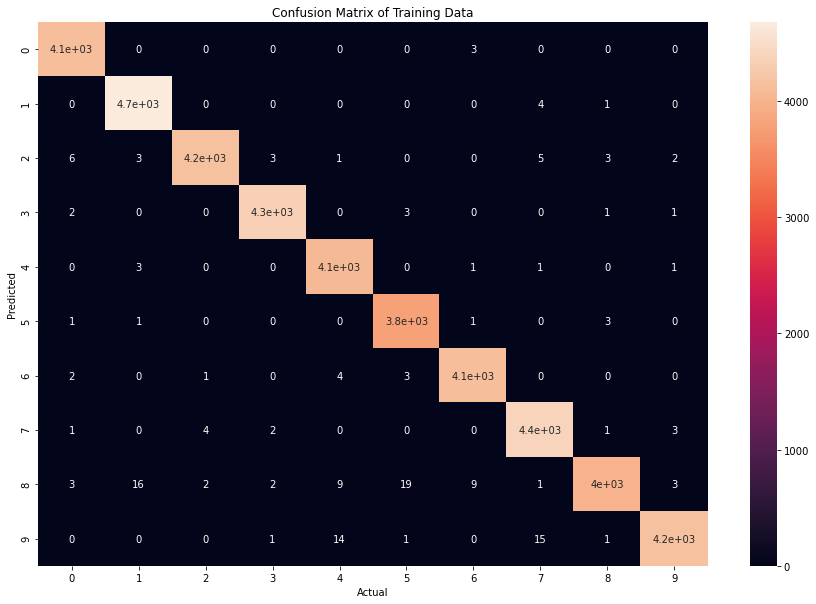

In [88]:
preds = np.argmax(best_model.predict(features_conv), axis=1)

cm = confusion_matrix(labels_train, preds)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix of Training Data')

**10.2 Metrics vs Epochs**

It can be seen that as the epochs went on that both the train and validation loss went down and the train and validation accuracy went up, as expected. However, the validation accuracy remained lower at the end, showing that there is variance in the model, meaning it is less generalizable. This is further demonstrated by the third diagram showing that at the end of the training the variance was higher than the avoidable bias, meaning that to improve the model the variance should be focussed on.

In [81]:
train_loss = history.history['loss']

train_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']

val_accuracy = history.history['val_accuracy']

avoidable_bias = 1 - np.array(train_accuracy)

variance = np.array(train_accuracy) - np.array(val_accuracy)

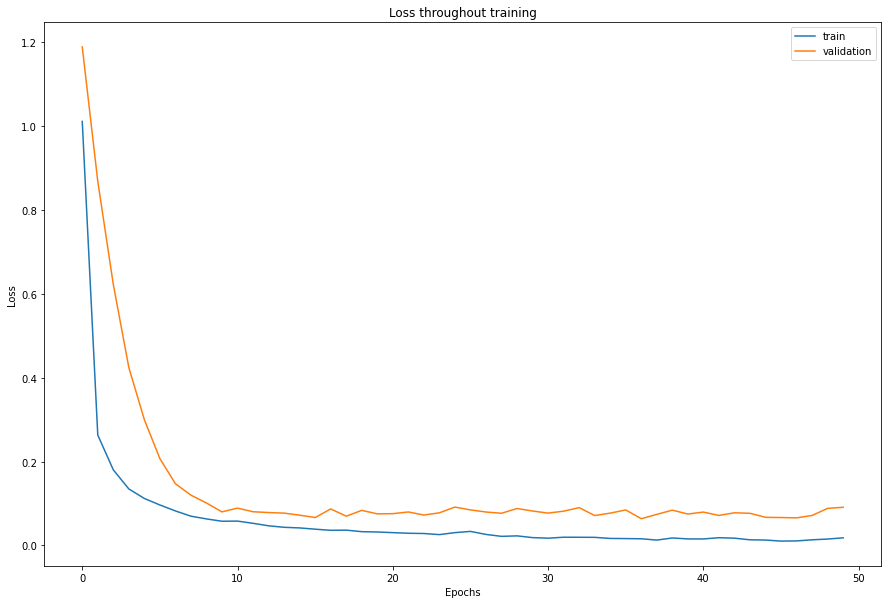

In [77]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(train_loss)), train_loss, label='train')
plt.plot(range(len(val_loss)), val_loss, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss throughout training')
plt.legend()

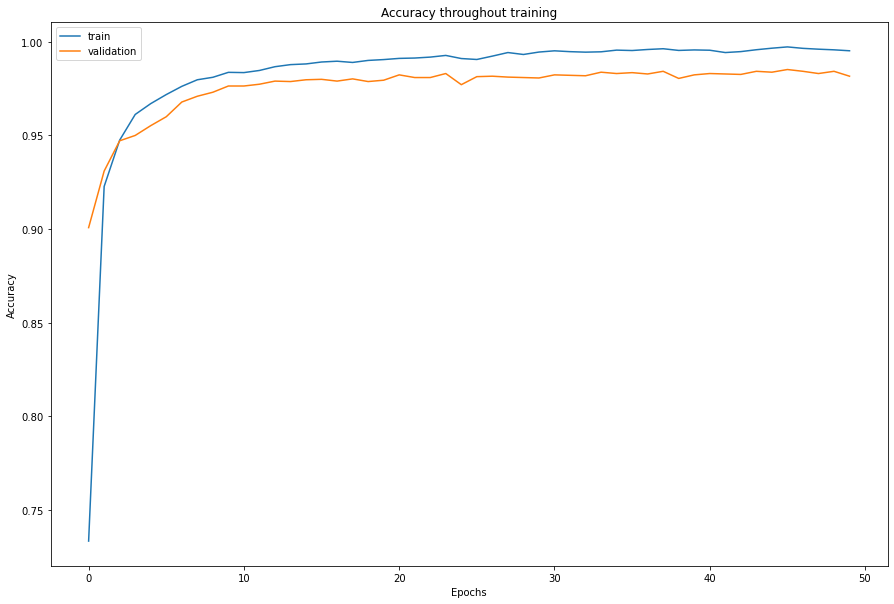

In [78]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(train_accuracy)), train_accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy throughout training')
plt.legend()

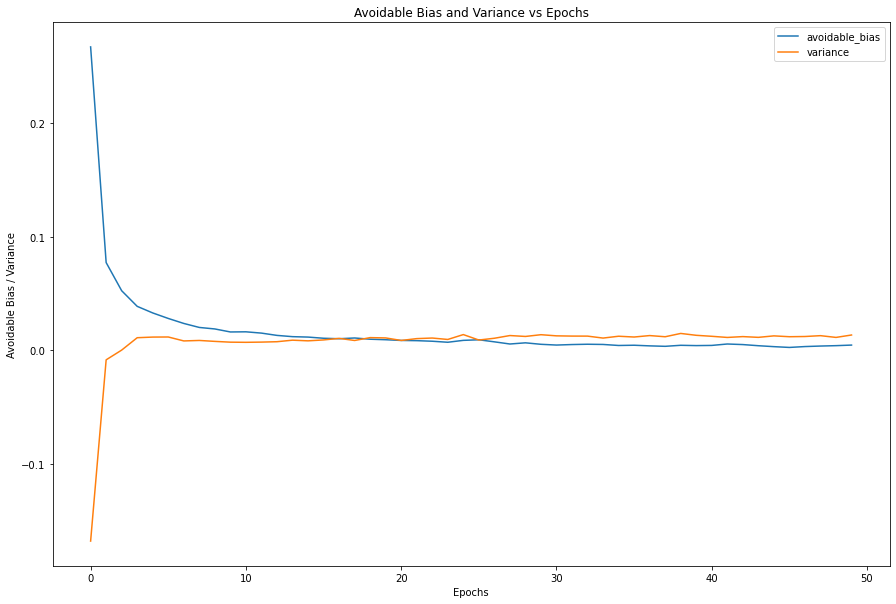

In [83]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(avoidable_bias)), avoidable_bias, label='avoidable_bias')
plt.plot(range(len(variance)), variance, label='variance')
plt.xlabel('Epochs')
plt.ylabel('Avoidable Bias / Variance')
plt.title('Avoidable Bias and Variance vs Epochs')
plt.legend()